In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import platform

In [49]:
# 파일 불러오기
df_s = pd.read_csv('./data/서울시음식물류폐기물발생원별발생량통계.csv', encoding='CP949')
df_s

,기간,자치구,발생량,가정-소계,가정-단독주택,가정-공동주택,가정-소형음식점,다량배출사업장-소계,다량배출사업장-집단급식소,다량배출사업장-음식점(200㎡ 이상),다량배출사업장-대규모점포,다량배출사업장-농수산시장,관광숙박다량배출사업장-시설
0,2015,서울시,3165.8,2514.7,983.0,908.0,623.7,651.1,214.7,269.5,110.8,25.9,30.2
1,2016,서울시,3075.0,2382.3,903.2,842.2,636.9,692.7,226.9,290.1,118.7,21.5,35.5
2,2017,서울시,2871.7,2211.9,812.8,778.4,620.7,659.8,212.1,280.2,109.5,17.3,40.7
3,2018,서울시,2818.9,2143.6,780.1,756.3,607.2,675.3,218.9,283.6,100.6,26.2,46.0
4,2019,서울시,2827.4,2122.0,727.2,784.8,610.0,488.4,185.9,268.9,16.4,4.3,12.9
5,2020,서울시,2539.7,2009.9,719.4,775.0,515.7,345.9,117.0,213.1,9.2,-,7.4


In [50]:
# 데이터프레임 타입 확인
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   기간                    6 non-null      int64  
 1   자치구                   6 non-null      object 
 2   발생량                   6 non-null      float64
 3   가정-소계                 6 non-null      float64
 4   가정-단독주택               6 non-null      float64
 5   가정-공동주택               6 non-null      float64
 6   가정-소형음식점              6 non-null      float64
 7   다량배출사업장-소계            6 non-null      float64
 8   다량배출사업장-집단급식소         6 non-null      float64
 9   다량배출사업장-음식점(200㎡ 이상)  6 non-null      float64
 10  다량배출사업장-대규모점포         6 non-null      float64
 11  다량배출사업장-농수산시장         6 non-null      object 
 12  관광숙박다량배출사업장-시설        6 non-null      float64
dtypes: float64(10), int64(1), object(2)
memory usage: 752.0+ bytes


In [51]:
# 데이터프레임 복제하기
df_s1 = df_s.copy()
df_s1

,기간,자치구,발생량,가정-소계,가정-단독주택,가정-공동주택,가정-소형음식점,다량배출사업장-소계,다량배출사업장-집단급식소,다량배출사업장-음식점(200㎡ 이상),다량배출사업장-대규모점포,다량배출사업장-농수산시장,관광숙박다량배출사업장-시설
0,2015,서울시,3165.8,2514.7,983.0,908.0,623.7,651.1,214.7,269.5,110.8,25.9,30.2
1,2016,서울시,3075.0,2382.3,903.2,842.2,636.9,692.7,226.9,290.1,118.7,21.5,35.5
2,2017,서울시,2871.7,2211.9,812.8,778.4,620.7,659.8,212.1,280.2,109.5,17.3,40.7
3,2018,서울시,2818.9,2143.6,780.1,756.3,607.2,675.3,218.9,283.6,100.6,26.2,46.0
4,2019,서울시,2827.4,2122.0,727.2,784.8,610.0,488.4,185.9,268.9,16.4,4.3,12.9
5,2020,서울시,2539.7,2009.9,719.4,775.0,515.7,345.9,117.0,213.1,9.2,-,7.4


In [52]:
# '-'문자 처리
df_s1 = df_s1.replace("-","0")
df_s1

,기간,자치구,발생량,가정-소계,가정-단독주택,가정-공동주택,가정-소형음식점,다량배출사업장-소계,다량배출사업장-집단급식소,다량배출사업장-음식점(200㎡ 이상),다량배출사업장-대규모점포,다량배출사업장-농수산시장,관광숙박다량배출사업장-시설
0,2015,서울시,3165.8,2514.7,983.0,908.0,623.7,651.1,214.7,269.5,110.8,25.9,30.2
1,2016,서울시,3075.0,2382.3,903.2,842.2,636.9,692.7,226.9,290.1,118.7,21.5,35.5
2,2017,서울시,2871.7,2211.9,812.8,778.4,620.7,659.8,212.1,280.2,109.5,17.3,40.7
3,2018,서울시,2818.9,2143.6,780.1,756.3,607.2,675.3,218.9,283.6,100.6,26.2,46.0
4,2019,서울시,2827.4,2122.0,727.2,784.8,610.0,488.4,185.9,268.9,16.4,4.3,12.9
5,2020,서울시,2539.7,2009.9,719.4,775.0,515.7,345.9,117.0,213.1,9.2,0,7.4


In [53]:
# 결측값 확인
df_s1.isnull().sum()

기간                      0
자치구                     0
발생량                     0
가정-소계                   0
가정-단독주택                 0
가정-공동주택                 0
가정-소형음식점                0
다량배출사업장-소계              0
다량배출사업장-집단급식소           0
다량배출사업장-음식점(200㎡ 이상)    0
다량배출사업장-대규모점포           0
다량배출사업장-농수산시장           0
관광숙박다량배출사업장-시설          0
dtype: int64

In [54]:
# 데이터 타입 변환
df_s1.astype({'다량배출사업장-대규모점포' : float,
              '다량배출사업장-농수산시장' : float,
              '관광숙박다량배출사업장-시설' : float
})


,기간,자치구,발생량,가정-소계,가정-단독주택,가정-공동주택,가정-소형음식점,다량배출사업장-소계,다량배출사업장-집단급식소,다량배출사업장-음식점(200㎡ 이상),다량배출사업장-대규모점포,다량배출사업장-농수산시장,관광숙박다량배출사업장-시설
0,2015,서울시,3165.8,2514.7,983.0,908.0,623.7,651.1,214.7,269.5,110.8,25.9,30.2
1,2016,서울시,3075.0,2382.3,903.2,842.2,636.9,692.7,226.9,290.1,118.7,21.5,35.5
2,2017,서울시,2871.7,2211.9,812.8,778.4,620.7,659.8,212.1,280.2,109.5,17.3,40.7
3,2018,서울시,2818.9,2143.6,780.1,756.3,607.2,675.3,218.9,283.6,100.6,26.2,46.0
4,2019,서울시,2827.4,2122.0,727.2,784.8,610.0,488.4,185.9,268.9,16.4,4.3,12.9
5,2020,서울시,2539.7,2009.9,719.4,775.0,515.7,345.9,117.0,213.1,9.2,0.0,7.4


In [55]:
# 발생량list를 만들어서 발생량 로우 값 넣어주기
발생량list=df_s1['발생량'].values.tolist()
발생량list

[3165.8, 3075.0, 2871.7, 2818.9, 2827.4, 2539.7]

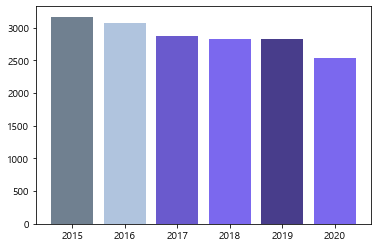

In [76]:
# 막대그래프 : 연도별 음식물류폐기물 발생량

# bar([x축 데이터], [y축 데이터])
x = [2015, 2016, 2017, 2018, 2019, 2020]
y = 발생량list
plt.bar(x,y, 
    color=['slategrey', 'lightsteelblue', 'slateblue', 'mediumslateblue','darkslateblue','mediumslateblue'])
plt.show()

Text(0.5, 1.0, '2020년 다량배출사업장 범주별')

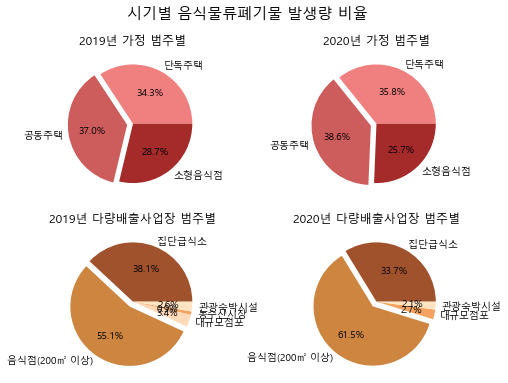

In [106]:
# subplot 그리기

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')


fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle('시기별 음식물류폐기물 발생량 비율', fontsize=15)


numbers1 = [727.2, 784.8, 610.0]
house1 = ['단독주택', '공동주택', '소형음식점']  
color = ['lightcoral', 'indianred', 'brown']

axes[0,0].pie(numbers1, labels=house1, autopct='%.1f%%', colors=color, explode=(0,0.1,0))
axes[0,0].set_title('2019년 가정 범주별')

numbers2 = [719.4, 775.0, 515.7]
axes[0,1].pie(numbers2, labels=house1, autopct='%.1f%%', colors=color, explode=(0,0.1,0))
axes[0,1].set_title('2020년 가정 범주별')


numbers3 = [185.9, 268.9, 16.4, 4.3, 12.9]
house2 = [ '집단급식소', '음식점(200㎡ 이상)', '대규모점포', '농수산시장', '관광숙박시설']
color1 = ['sienna', 'peru', 'peachpuff', 'sandybrown', 'bisque']  
axes[1,0].pie(numbers3, labels=house2, autopct='%.1f%%', colors=color1,  explode=(0,0.1,0,0,0))
axes[1,0].set_title('2019년 다량배출사업장 범주별')


numbers4 = [117.0, 213.1, 9.2, 7.4]
house3= [ '집단급식소', '음식점(200㎡ 이상)', '대규모점포', '관광숙박시설']
color2 = ['sienna', 'peru', 'sandybrown', 'bisque'] 
axes[1,1].pie(numbers4, labels=house3, autopct='%.1f%%', colors=color2, explode=(0,0.1,0,0))
axes[1,1].set_title('2020년 다량배출사업장 범주별')



In [ ]:
# pie 그래프 그리기_가정범주별 (2019년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['lightcoral', 'indianred', 'brown']    
numbers1 = [727.2, 784.8, 610.0]
house2 = [ '단독주택', '공동주택', '소형음식점']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0,0.1,0))
plt.legend(loc = 'upper left')
plt.title('2019년 가정 범주별 쓰레기 발생량 비율')
plt.show()

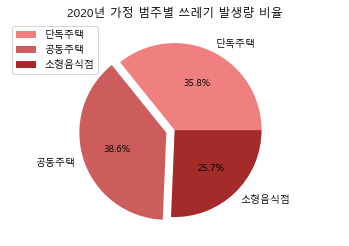

In [ ]:
# pie 그래프 그리기_가정범주별 (2020년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['lightcoral', 'indianred', 'brown']    
numbers = [719.4, 775.0, 515.7]
house = [ '단독주택', '공동주택', '소형음식점']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0,0.1,0))
plt.legend(loc = 'upper left')
plt.title('2020년 가정 범주별 쓰레기 발생량 비율')
plt.show()

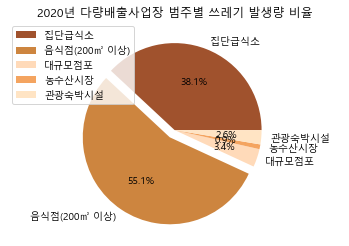

In [ ]:
# pie 그래프 그리기_다량배출사업장 (2019년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['sienna', 'peru', 'peachpuff', 'sandybrown', 'bisque']    
numbers = [185.9, 268.9, 16.4, 4.3, 12.9]
house = [ '집단급식소', '음식점(200㎡ 이상)', '대규모점포', '농수산시장', '관광숙박시설']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0,0.1,0,0,0))
plt.legend(loc = 'upper left')
plt.title('2020년 다량배출사업장 범주별 쓰레기 발생량 비율')
plt.show()

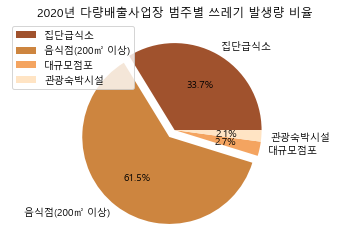

In [ ]:
# pie 그래프 그리기_다량배출사업장 (2020년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['sienna', 'peru', 'sandybrown', 'bisque']    
numbers = [117.0, 213.1, 9.2, 7.4]
house = [ '집단급식소', '음식점(200㎡ 이상)', '대규모점포', '관광숙박시설']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0,0.1,0,0))
plt.legend(loc = 'upper left')
plt.title('2020년 다량배출사업장 범주별 쓰레기 발생량 비율')
plt.show()

In [ ]:
df_v = pd.read_csv('./data/서울시음식물류폐기물발생량및처리현황20152020.csv', encoding='CP949')
df_v

,기간,자치구,발생량,재활용-사료화,재활용-퇴비화,재활용-기타,매립,소각
0,2015,서울시,3165.8,2175.6,847.0,143.2,0.0,0.0
1,2016,서울시,3075.0,1958.1,994.3,122.6,0.0,0.0
2,2017,서울시,2871.7,1843.4,932.9,95.4,0.0,0.0
3,2018,서울시,2818.9,1486.7,1005.3,324.3,0.4,2.2
4,2019,서울시,2827.4,1478.3,1181.0,168.1,0.0,0.0
5,2020,서울시,2539.7,1207.4,1105.9,226.4,0.0,0.0


In [ ]:
df_v1 = df_v.copy()
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기간       6 non-null      int64  
 1   자치구      6 non-null      object 
 2   발생량      6 non-null      float64
 3   재활용-사료화  6 non-null      float64
 4   재활용-퇴비화  6 non-null      float64
 5   재활용-기타   6 non-null      float64
 6   매립       6 non-null      float64
 7   소각       6 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 512.0+ bytes


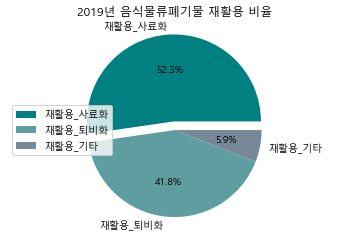

In [ ]:
# pie 그래프 그리기_음식물류폐기류 재활용 (2019년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['teal', 'cadetblue', 'lightslategray']    
numbers = [1478.3, 1181.0, 168.1]
house = ['재활용_사료화', '재활용_퇴비화', '재활용_기타']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0.1,0,0))
plt.legend(loc = 'center left')
plt.title('2019년 음식물류폐기물 재활용 비율')
plt.show()

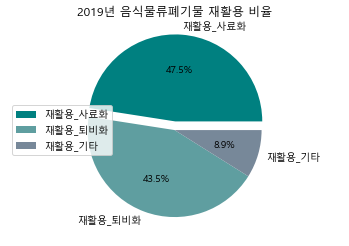

In [ ]:
# pie 그래프 그리기_음식물류폐기류 재활용 (2019년)

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['teal', 'cadetblue', 'lightslategray']    
numbers = [1207.4, 1105.9, 226.4]
house = ['재활용_사료화', '재활용_퇴비화', '재활용_기타']
plt.axis('equal') # 파이 차트를 원형으로 그려줌
plt.pie(numbers, labels=house, autopct='%.1f%%', colors=color, explode=(0.1,0,0))
plt.legend(loc = 'center left')
plt.title('2019년 음식물류폐기물 재활용 비율')
plt.show()

In [70]:
# 수도권매립지관리공사에 들어오는 수도권 생활폐기물 반입량

df_b = pd.read_csv('./data/수도권매립지관리공사_서울시_연도별 _폐기물_반입량.csv', encoding='CP949')
df_b1 = df_b.copy()
df_b1

,연도,지자체명,생활폐기물 반입량(kg)
0,1999,서울특별시,1863765887
1,2000,서울특별시,1789157849
2,2001,서울특별시,1690577794
3,2002,서울특별시,1684950240
4,2003,서울특별시,1541943387
5,2004,서울특별시,1346257217
6,2005,서울특별시,825500431
7,2006,서울특별시,827968449
8,2007,서울특별시,702722318
9,2008,서울특별시,550327640


In [71]:
df_c = pd.read_csv('./data/수도권매립지관리공사_경기도_연도별_폐기물_반입량.csv', encoding='CP949')
df_c1 = df_c.copy()
df_c1 

,연도,지자체명,생활폐기물 반입량(kg)
0,1999,경기도,754114982
1,2000,경기도,680370457
2,2001,경기도,582814120
3,2002,경기도,513936930
4,2003,경기도,534484680
5,2004,경기도,444465050
6,2005,경기도,301459490
7,2006,경기도,332546689
8,2007,경기도,353832560
9,2008,경기도,292553690


In [75]:
df_bci =pd.concat([df_b1,df_c1,df_i1], ignore_index=True)
df_bci

,연도,지자체명,생활폐기물 반입량(kg)
0,1999,서울특별시,1863765887
1,2000,서울특별시,1789157849
2,2001,서울특별시,1690577794
3,2002,서울특별시,1684950240
4,2003,서울특별시,1541943387
...,...,...,...
61,2016,인천광역시,70179470
62,2017,인천광역시,86009070
63,2018,인천광역시,106888000
64,2019,인천광역시,126603760


In [72]:
df_i = pd.read_csv('./data/수도권매립지관리공사_인천시_연도별_폐기물_반입량.csv', encoding='CP949')
df_i1 = df_i.copy()
df_i1 

,연도,지자체명,생활폐기물 반입량(kg)
0,1999,인천광역시,461231170
1,2000,인천광역시,463590780
2,2001,인천광역시,414037340
3,2002,인천광역시,324496020
4,2003,인천광역시,277186510
5,2004,인천광역시,231221420
6,2005,인천광역시,172391670
7,2006,인천광역시,103978111
8,2007,인천광역시,102106400
9,2008,인천광역시,99581110


In [ ]:
df_bci = pd.melt(df_bci,["연도"], var_name="지자체명", value_name="생활폐기물 반입량(kg)")
df_bci = df_bci.sort_values(by=["religion"]) # 종교 이름순으로 정렬
df_bci.head(10) # 상단 10개만 보겠습니다.